# Dados Abertos - Senado Brasileiro, CEAPS

## Carregando módulos usados na análise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import re
import csv
import glob
%matplotlib inline

pd.options.plotting.backend = "plotly"

## Carregando Dados

### Ano de 2022

In [2]:
# header=1 -> ignore first line header
df = pd.read_csv('data/despesa_ceaps_2022.csv', delimiter=';', header=1, encoding='iso-8859-1')
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000,2173617


### Outros Anos

In [3]:
datas = {}
for file in sorted(glob.glob('data/*.csv')):
    
    if re.search(r'[0-9]+(.csv)', file):
        print('>, ', file)
        datas[ re.search(r'[0-9]+', file ).group(0) ] = pd.read_csv(file, delimiter=';', header=1, encoding='iso-8859-1')

>,  data/despesa_ceaps_2008.csv
>,  data/despesa_ceaps_2009.csv
>,  data/despesa_ceaps_2010.csv
>,  data/despesa_ceaps_2011.csv
>,  data/despesa_ceaps_2012.csv
>,  data/despesa_ceaps_2013.csv
>,  data/despesa_ceaps_2014.csv
>,  data/despesa_ceaps_2015.csv
>,  data/despesa_ceaps_2016.csv
>,  data/despesa_ceaps_2017.csv
>,  data/despesa_ceaps_2018.csv
>,  data/despesa_ceaps_2019.csv
>,  data/despesa_ceaps_2020.csv
>,  data/despesa_ceaps_2021.csv
>,  data/despesa_ceaps_2022.csv


In [4]:
dff = pd.concat(datas, ignore_index=True)
dff

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008091e+12
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"386,6",2.008091e+12
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008101e+12
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"2610,68",2.008101e+12
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008111e+12
...,...,...,...,...,...,...,...,...,...,...,...
317774,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,06/12/2022,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...","2893,04",2.191398e+06
317775,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,09/12/2022,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...","1180,19",2.192272e+06
317776,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,20/12/2022,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...","2671,9",2.192274e+06
317777,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,21/12/2022,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...","1334,31",2.192244e+06


In [5]:
#func = lamda l: 
#datas[ano]['VALOR_REEMBOLSADO'] = s.mask( re.search(r'[0-9]+(\,)[0-9]+|[0-9]+(\.)[0-9]+', s) != None , 0 )
#dff.mask( pd.isna( dff['VALOR_REEMBOLSADO']), 0) 
dff['VALOR_REEMBOLSADO'].fillna(0.0)

0         12351,52
1            386,6
2         12351,52
3          2610,68
4         12351,52
            ...   
317774     2893,04
317775     1180,19
317776      2671,9
317777     1334,31
317778     2250,72
Name: VALOR_REEMBOLSADO, Length: 317779, dtype: object

In [6]:
dff = dff.dropna(subset=['DATA'])

In [7]:
dff

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2449,2009,12,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,11/12/2009,NaN,5000,222467.0
2450,2009,12,ACIR GURGACZ,Divulgação da atividade parlamentar,02.831.112/0002-09,INTERCOM INTERMEDIAÇÕES E COMUNICAÇÃO INTEGRAD...,000330,09/12/2009,NaN,12620,222466.0
2456,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",00.306.597/0016-83,Cascol combustíveis para veículos Ltda,106471,12/04/2009,NaN,"179,01",165740.0
2457,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",00.358.192/0001-02,Ribeiro e Pereira Ltda,77472,04/04/2009,NaN,30,165739.0
2458,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",06.098.111/0001-69,Tudo de Bom Comércio de alimentos Ltda,10169,14/04/2009,NaN,"215,8",165741.0
...,...,...,...,...,...,...,...,...,...,...,...
317774,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,06/12/2022,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...","2893,04",2191398.0
317775,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,09/12/2022,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...","1180,19",2192272.0
317776,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,20/12/2022,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...","2671,9",2192274.0
317777,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,21/12/2022,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...","1334,31",2192244.0


In [8]:

s = dff['VALOR_REEMBOLSADO'].apply(lambda x: True if re.search(r'[0-9]+(,)[0-9]+|[0-9]+(.)[0-9]+|[0-9]+', x ) == None else False)
#dff.mask( dff.apply( lambda x: True if re.search(r'[0-9]+(\,)[0-9]+|[0-9]+(\.)[0-9]+', x) == None else False), 0 )

In [9]:
dff = dff.mask(s, 0.0)
dff

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2449,2009,12,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,11/12/2009,NaN,5000,222467.0
2450,2009,12,ACIR GURGACZ,Divulgação da atividade parlamentar,02.831.112/0002-09,INTERCOM INTERMEDIAÇÕES E COMUNICAÇÃO INTEGRAD...,000330,09/12/2009,NaN,12620,222466.0
2456,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",00.306.597/0016-83,Cascol combustíveis para veículos Ltda,106471,12/04/2009,NaN,"179,01",165740.0
2457,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",00.358.192/0001-02,Ribeiro e Pereira Ltda,77472,04/04/2009,NaN,30,165739.0
2458,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",06.098.111/0001-69,Tudo de Bom Comércio de alimentos Ltda,10169,14/04/2009,NaN,"215,8",165741.0
...,...,...,...,...,...,...,...,...,...,...,...
317774,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,06/12/2022,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...","2893,04",2191398.0
317775,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,09/12/2022,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...","1180,19",2192272.0
317776,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,20/12/2022,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...","2671,9",2192274.0
317777,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,21/12/2022,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...","1334,31",2192244.0


In [10]:
dff['VALOR_REEMBOLSADO'] = dff['VALOR_REEMBOLSADO'].apply( lambda x: x.strip(' ') )
dff['VALOR_REEMBOLSADO'] = dff['VALOR_REEMBOLSADO'].apply( lambda x: x.replace('\n\t','') )

In [11]:
dff['VALOR_REEMBOLSADO'] = dff['VALOR_REEMBOLSADO'].replace( regex={r'(,)':'.'} )
#dfs['VALOR_REEMBOLSADO'] = pd.to_numeric(dff['VALOR_REEMBOLSADO'], downcast='float')
dff

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2449,2009,12,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,11/12/2009,NaN,5000,222467.0
2450,2009,12,ACIR GURGACZ,Divulgação da atividade parlamentar,02.831.112/0002-09,INTERCOM INTERMEDIAÇÕES E COMUNICAÇÃO INTEGRAD...,000330,09/12/2009,NaN,12620,222466.0
2456,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",00.306.597/0016-83,Cascol combustíveis para veículos Ltda,106471,12/04/2009,NaN,179.01,165740.0
2457,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",00.358.192/0001-02,Ribeiro e Pereira Ltda,77472,04/04/2009,NaN,30,165739.0
2458,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",06.098.111/0001-69,Tudo de Bom Comércio de alimentos Ltda,10169,14/04/2009,NaN,215.8,165741.0
...,...,...,...,...,...,...,...,...,...,...,...
317774,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,06/12/2022,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...",2893.04,2191398.0
317775,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,09/12/2022,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...",1180.19,2192272.0
317776,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,20/12/2022,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...",2671.9,2192274.0
317777,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,21/12/2022,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...",1334.31,2192244.0


In [12]:
dff['VALOR_REEMBOLSADO'] = pd.to_numeric(dff['VALOR_REEMBOLSADO'], downcast='float', errors='coerce').dropna()
dff

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2449,2009,12,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,11/12/2009,NaN,5000.00,222467.0
2450,2009,12,ACIR GURGACZ,Divulgação da atividade parlamentar,02.831.112/0002-09,INTERCOM INTERMEDIAÇÕES E COMUNICAÇÃO INTEGRAD...,000330,09/12/2009,NaN,12620.00,222466.0
2456,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",00.306.597/0016-83,Cascol combustíveis para veículos Ltda,106471,12/04/2009,NaN,179.01,165740.0
2457,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",00.358.192/0001-02,Ribeiro e Pereira Ltda,77472,04/04/2009,NaN,30.00,165739.0
2458,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",06.098.111/0001-69,Tudo de Bom Comércio de alimentos Ltda,10169,14/04/2009,NaN,215.80,165741.0
...,...,...,...,...,...,...,...,...,...,...,...
317774,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,06/12/2022,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...",2893.04,2191398.0
317775,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,09/12/2022,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...",1180.19,2192272.0
317776,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,20/12/2022,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...",2671.90,2192274.0
317777,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,21/12/2022,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...",1334.31,2192244.0


In [13]:
s = dff['DATA'].apply( lambda x: True if re.search(r'[0-9]{2}(/)[0-9]{2}(/)[0-9]{4}$', x) != None else False )
dff['DATA'].mask(s, pd.NA)
dff['DATA'].dropna()
dff

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2449,2009,12,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,11/12/2009,NaN,5000.00,222467.0
2450,2009,12,ACIR GURGACZ,Divulgação da atividade parlamentar,02.831.112/0002-09,INTERCOM INTERMEDIAÇÕES E COMUNICAÇÃO INTEGRAD...,000330,09/12/2009,NaN,12620.00,222466.0
2456,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",00.306.597/0016-83,Cascol combustíveis para veículos Ltda,106471,12/04/2009,NaN,179.01,165740.0
2457,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",00.358.192/0001-02,Ribeiro e Pereira Ltda,77472,04/04/2009,NaN,30.00,165739.0
2458,2009,4,ADELMIR SANTANA,"Locomoção, hospedagem, alimentação, combustíve...",06.098.111/0001-69,Tudo de Bom Comércio de alimentos Ltda,10169,14/04/2009,NaN,215.80,165741.0
...,...,...,...,...,...,...,...,...,...,...,...
317774,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,06/12/2022,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...",2893.04,2191398.0
317775,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,09/12/2022,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...",1180.19,2192272.0
317776,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,20/12/2022,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...",2671.90,2192274.0
317777,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,21/12/2022,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...",1334.31,2192244.0


In [14]:
dff['DATA'] = pd.to_datetime(dff['DATA'], dayfirst=True)
dff

2449      False
2450      False
2456      False
2457      False
2458      False
          ...  
317774    False
317775    False
317776    False
317777    False
317778    False
Name: DATA, Length: 314635, dtype: bool

## Tratamento e Limpeza dos Dados (Data Wrangling)

No campo 'VALOR_REEMBOLSADO' trocar virgula por ponto e converter para tipo numérico (float).

In [23]:
df['VALOR_REEMBOLSADO'] = pd.to_numeric( df['VALOR_REEMBOLSADO'].replace(regex=r'(,)', value='.'), downcast='float')


In [24]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500.0,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000.0,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000.0,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000.0,2173617


Converter campo 'DATA' do tipo string para tipo Date

In [25]:
# Converter DATA para tipo Date
df['DATA'] = pd.to_datetime(df['DATA'], dayfirst=True)

In [26]:
df

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,2022-01-03,Despesa com pagamento de aluguel de imóvel par...,6000.00,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,2022-01-04,Despesa com divulgação da atividade parlamenta...,1500.00,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,2022-01-14,Despesa com produção de texto e edição de víde...,6000.00,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,2022-01-18,Divulgação da atividade parlamentar,1000.00,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,2022-01-17,Divulgação da atividade parlamentar,2000.00,2173617
...,...,...,...,...,...,...,...,...,...,...,...
16593,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,2022-12-06,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...",2893.04,2191398
16594,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,2022-12-09,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...",1180.19,2192272
16595,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,2022-12-20,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...",2671.90,2192274
16596,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,2022-12-21,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...",1334.31,2192244


## Gastos Ano 2022

In [27]:
senadores = df['SENADOR'].unique()
df_gastos_sn = { 'Senador':[], 'GastoAnual':[], 'RegsSemDocumento':[], 'RegsSemDetalhamentoDoGasto':[] }

In [28]:
for i in senadores:
    df_gastos_sn['Senador'].append(i)
    df_gastos_sn['GastoAnual'].append( df[ df['SENADOR'] == i ]['VALOR_REEMBOLSADO'].sum() )
    df_gastos_sn['RegsSemDocumento'].append( df[ df['DOCUMENTO'].isna() == True][df['SENADOR'] == i ].isna().sum()['DOCUMENTO'] )
    df_gastos_sn['RegsSemDetalhamentoDoGasto'].append( df[ df['DETALHAMENTO'].isna() == True][df['SENADOR'] == i ].isna().sum()['DETALHAMENTO'] )


/tmp/ipykernel_12323/4245188335.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_12323/4245188335.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [29]:
#ds = pd.DataFrame( { 'Senador': df_gastos_sn['Senador'], 'Gastos': df_gastos_sn['GastoAnual'] })
ds = pd.DataFrame( df_gastos_sn )
ds = ds.sort_values(by=['GastoAnual'], ascending=False)
ds

,Senador,GastoAnual,RegsSemDocumento,RegsSemDetalhamentoDoGasto
50,LUCAS BARRETO,511319.78,0.0,228.0
90,TELMÁRIO MOTA,488693.40,0.0,249.0
64,MECIAS DE JESUS,488586.66,0.0,127.0
68,OMAR AZIZ,487541.24,0.0,0.0
9,CHICO RODRIGUES,486958.05,0.0,72.0
...,...,...,...,...
5,ANTONIO ANASTASIA,19647.13,3.0,15.0
33,GUARACY SILVEIRA,19285.82,0.0,1.0
49,LEILA BARROS,10567.64,12.0,12.0
63,MARIA ELIZA DE AGUIAR E SILVA,10136.42,0.0,0.0


### 10 Senadores com Maior Gastos 2022

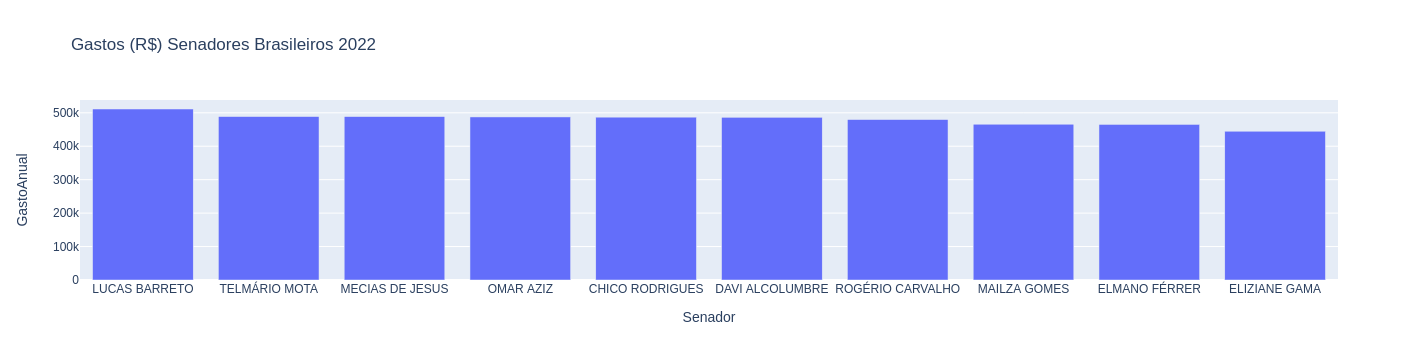

In [30]:
ds[:10].plot(x='Senador', y='GastoAnual', title='Gastos (R$) Senadores Brasileiros 2022', kind='bar')

### 10 Senadores com mais ocorrência de falta de Documento comprobatório do gasto na Base de Dados

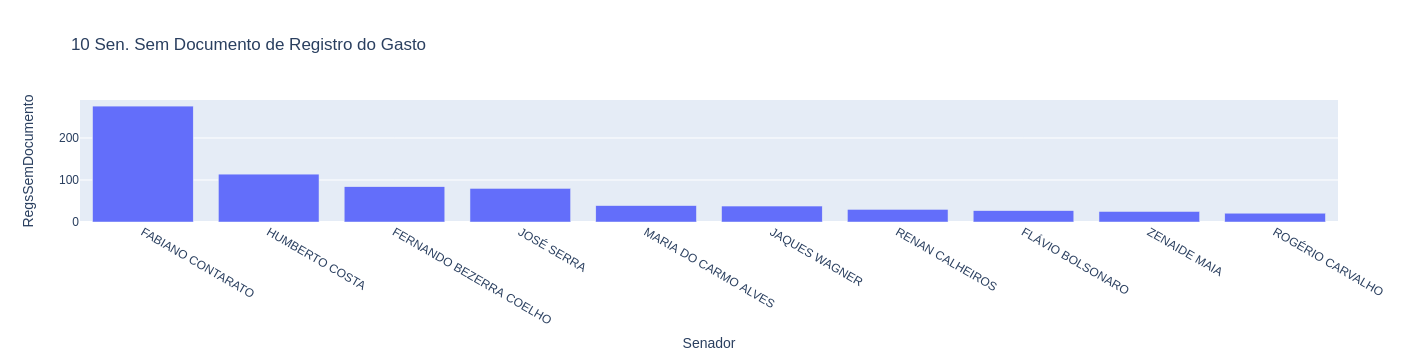

In [31]:
ds.sort_values(by=['RegsSemDocumento'], ascending=False)[:10].plot(x='Senador', y='RegsSemDocumento', title='10 Sen. Sem Documento de Registro do Gasto', kind='bar')

In [22]:
df[ df['DOCUMENTO'].isna() == True][df['SENADOR'] == 'ZENAIDE MAIA'].isna().sum()

/tmp/ipykernel_12323/2406578663.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



ANO                   0
MES                   0
SENADOR               0
TIPO_DESPESA          0
CNPJ_CPF              0
FORNECEDOR            0
DOCUMENTO            25
DATA                  0
DETALHAMENTO         25
VALOR_REEMBOLSADO     0
COD_DOCUMENTO         0
dtype: int64